<a href="https://colab.research.google.com/github/davis689/binder/blob/master/CHEM452/Boltzmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boltzmann derivation

Sympy is a library for dealing with symbolic math as opposed to numerical math. Here we import a number of symbols that we'll use in our derivation as well as infinity (oo) and the log function. These we can use by just typing the symbol itself. We'll also import sympy itself with the abbreviation $sp$. To use the rest of the libary that we didn't import specially, we'll need to preface our sympy function with sp ($e.g.$ sp.factorial to get a factorial). If we were going to use factorial repeatedly we could add 

```
from sympy import factorial
```
to access factorial with `factorial` instead of `sp.factorial`.



In [1]:
from sympy.abc import i, k, m, n, x
from sympy import oo, log
import sympy as sp

In [2]:
i=sp.symbols('i',integer=True) # define an index, i, which is an integer. 
N=sp.symbols('N',constant=True) # define the number of molecules which is constant.
n_i,W=sp.symbols('n_i,W', nonnegative=True,integer=True) # define the occupation number and the number of ways of arranging energy among molecules. Both of these could be zero so we'll limit them to nonnegative rather than positive.

The number of ways that $N$ molecules can be arranged into energy levels with $n_0$ in the ground level, $n_1$ in the first excited state, $n_2$ in the second excited state, and so on is $$W=\dfrac{N!}{n_0!n_1!n_2!...}$$ We can replace the denominator with $\Pi_{i=0}^\infty n_i!$ to make things look more tidy if not simpler. Of course we don't actually have to include terms for unoccupied levels (since 0!=1) or for singly occupied levels (since 1! is also 1). Only doubly or more highly occupied levels will affect the calculation for number of ways.

In [3]:
ways=sp.Eq(W,sp.factorial(N)/sp.Product(sp.factorial(n_i),(i,0,oo))) # sp.Eq makes an equation with (left-hand-side , right-hand-side) order. We name this equation 'ways'.
ways

Eq(W, factorial(N)/Product(factorial(n_i), (i, 0, oo)))

It will turn out to be easier to deal with the log of W. We're only interested in finding the distribution that gives the maximum of W and that distribution will also give the maximum of logW so we can use W or logW and since logW is easier, we choose that.

In [4]:
sp.log(ways.rhs) #ways.rhs takes the right-hand-side of the 'ways' equation.

log(factorial(N)/Product(factorial(n_i), (i, 0, oo)))

Let's use the rules of logs to separate the numerator from the denominator.

In [5]:
lnways=sp.Eq(sp.log(W),sp.expand_log(sp.log(ways.rhs), force=True)) 
lnways

Eq(log(W), log(factorial(N)) - Sum(log(factorial(n_i)), (i, 0, oo)))

##Stirling's approximation (a side trip)

Factorials can be problematic in derivations since they require multiplying arbitrary numbers of integers together. It would be great to have a way to write factorials with a normal algebraic experession. *Stirlings approximation* will allow us to get rid of the factorials. Stirlings approximation is $$lnx!=xlnx-x$$
We can test this approximation's accuracy for relatively small numbers, x, up to about 100000. (We can test further but the calculation time gets long.)

In [6]:
x=10 
lnxfact=sp.log(sp.factorial(x)) # calculation using factorial
lnxSA= x*sp.log(x)-x # calculation using Stirling
print("For x=",x,":")
print("actual ln(x):",lnxfact.evalf(),"Stirling's approx.:",lnxSA.evalf(),"%difference:",((lnxfact-lnxSA)/lnxfact).evalf()*100,"%")

For x= 10 :
actual ln(x): 15.1044125730755 Stirling's approx.: 13.0258509299405 %difference: 13.7612875249463 %


You can change N to a higher number and see how the approximation gets better.

We can make a comparison table by introducing a loop and doing the calculations multiple times for larger and larger values of N.

In [7]:
from tabulate import tabulate # to help make tables
import sys;sys.set_int_max_str_digits(0) # removes some kind of limitation on size of numbers for calculations.
table=[] #start with an empty table.
for x in [10,100,1000,10000,100000]:
  lnxfact=sp.log(sp.factorial(x)) # calculation using factorial
  lnxSA= x*sp.log(x)-x # calculation using Stirling
  percentdiff=(lnxfact-lnxSA)/lnxfact*100
  table.append([x,lnxfact,lnxSA,percentdiff])
print(tabulate(table, headers=["x","actual ln(x)","Stirling's approx.", "% difference"], tablefmt='fancy_grid'))


╒════════╤════════════════╤══════════════════════╤════════════════╕
│      x │   actual ln(x) │   Stirling's approx. │   % difference │
╞════════╪════════════════╪══════════════════════╪════════════════╡
│     10 │    15.1044     │         13.0259      │   13.7613      │
├────────┼────────────────┼──────────────────────┼────────────────┤
│    100 │   363.739      │        360.517       │    0.885897    │
├────────┼────────────────┼──────────────────────┼────────────────┤
│   1000 │  5912.13       │       5907.76        │    0.0739649   │
├────────┼────────────────┼──────────────────────┼────────────────┤
│  10000 │ 82108.9        │      82103.4         │    0.00672779  │
├────────┼────────────────┼──────────────────────┼────────────────┤
│ 100000 │     1.0513e+06 │          1.05129e+06 │    0.000634967 │
╘════════╧════════════════╧══════════════════════╧════════════════╛


**How good is the approximation for single digit numbers? Double digit numbers? 100000? Avogadro's number?**

##back to the derivation
Substituting Stirling's approximation gives us an expression free of factorials. Here we use a wild card, a, to replace all the $ln\, a!$ regardless of the identity of $a$. Our equation had two factorials terms (one of $N$ and one of $n_i$) and we want our substitution to work for both of them. `Wild` does this for us. 

In [8]:
a = sp.Wild('a') #
lnways=lnways.replace(sp.log(sp.factorial(a)),a*sp.log(a)-a)
lnways

Eq(log(W), N*log(N) - N - Sum(n_i*log(n_i) - n_i, (i, 0, oo)))

We can expand to obtain two separate summations.

In [9]:
lnways.expand()

Eq(log(W), N*log(N) - N - Sum(-n_i, (i, 0, oo)) - Sum(n_i*log(n_i), (i, 0, oo)))

Canceling negatives, the third term can be rewritten as $+∑n_i$ 

**What is the value of this summation if we sum over all the possible levels?**

Substitute this for the sum.

In [10]:
lnways1=lnways.expand().replace(sp.Sum(-n_i,(i,0,oo)),-N)
lnways1

Eq(log(W), N*log(N) - Sum(n_i*log(n_i), (i, 0, oo)))

Now we have an expression that we can maximize with respect to the occupation numbers, $n_i$.

In [11]:
sp.Eq(sp.diff(log(W),n_i),sp.diff(N*log(N)-sp.Sum(n_i*log(n_i),(i,0,oo)),n_i)) #sp.diff takes the derivative

Eq(0, -Sum(log(n_i) + 1, (i, 0, oo)))

When W (or ln(W) is a maximum, the summation must equal zero. The derivative in terms of $n_i$ is actually a set of derivatives such that $$dlnW=- (log (n_1)+1)dn_1+- (log (n_2)+1)dn_2+-(log (n_3)+1)dn_3+...=0$$
In order for the whole series to be equal to zero, each term needs to be equal to zero

In [39]:
sp.Eq(0,sp.diff(n_i*log(n_i),n_i))

Eq(0, log(n_i) + 1)

However, at this stage we need to take a step back and look at what we've done. What we've done so far is minimize the number of ways (or the logarithm of the number of ways) that a particle's energy can be arranged on a set of energy levels. There are two constraints that we have not yet considered. First, the various $n_i$ are not independent of each other. Raising $n_1$ necessarily lowers some other occupation number(s) since the total of all of the occupation numbers must be unity. $$\Sigma n_i = 1$$

Second, changing the occupation numbers can change the energy but our scenario specifies that we start with a given number of particles which have a given energy level configuration and we have a specified amount of total energy available (usually indicated as a system in thermal equilibrium at a given temperature). So any changes in occupation numbers must keep the total energy constant. $$\Sigma n_i ɛ_i = E$$

To optimize relative to constraints is a harder problem but the [Lagrange method of undetermined multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier) is our friend. Here the constraints multiplied by their ${undetermined\, multipliers}$ will be $$\alpha'(1-\Sigma n_i)$$ and $$\beta(E-\Sigma n_i ɛ_i)$$

Let's add these constraints into our log(W) expression.

First, we'll tell sympy that we want to use some new sympols, what names we'll call them, and what symbol we'd like to display with those names. These are all real number constants and telling sympy that may decrease the difficulty of manipulations later on if we don't give it this information. It's a good idea to define symbols with as much information about what type of number they are as possible. We might possibly add 'positive=True' or even 'nonnegative=True' if we want to include the possibility that the number could be zero as well as positive.

In [13]:
alph,alpha,beta,E,eps_i=sp.symbols("alphaprime,alpha,beta,E,\epsilon_i",constant=True,real=True)


In [14]:
lnways=sp.Eq(lnways1.lhs,lnways1.rhs-alph*(1-sp.Sum(n_i,(i,0,oo)))-beta*(E-sp.Sum(n_i*eps_i,(i,0,oo))))
lnways

Eq(log(W), N*log(N) - alphaprime*(1 - Sum(n_i, (i, 0, oo))) - beta*(E - Sum(\epsilon_i*n_i, (i, 0, oo))) - Sum(n_i*log(n_i), (i, 0, oo)))

In [15]:
sp.Eq(sp.diff(lnways.lhs,n_i),sp.diff(lnways.rhs,n_i))

Eq(0, alphaprime*Sum(1, (i, 0, oo)) + beta*Sum(\epsilon_i, (i, 0, oo)) - Sum(log(n_i) + 1, (i, 0, oo)))

Again, as before, each term must be equal to zero so we can remove the summations.

In [16]:
dlnways=sp.Eq(sp.diff(lnways.lhs,n_i),sp.diff(lnways.rhs,n_i))
dlnways=sp.Eq(0,alph+beta*eps_i-sp.log(n_i)+1)
dlnways=dlnways.subs(alph+1,alpha)
dlnways

Eq(0, \epsilon_i*beta + alpha - log(n_i))

In [17]:
nn_i=sp.Eq(n_i,sp.solve(dlnways,n_i)[0])
nn_i

Eq(n_i, exp(\epsilon_i*beta + alpha))

##Finding $\alpha$
For use later, let's also solve for ln($n_i$). This would simply be ln($n_i$)=$ϵ_i$β+α

The sum of all the occupation numbers, as we've already seen, is $N$. Therefore $$\Sigma e^{\alpha + \beta ɛ_i}=N$$ Since $\alpha$ doesn't include $i$, we can remove its term from the summation and find that $e^\alpha=\dfrac{N}{\Sigma \beta ɛ_i}$ 

This gives us $$n_i=N\dfrac{e^{\beta ɛ_i}}{\Sigma e^{\beta ɛ_j}}$$ where the summation in the denominator has been switched to $j$ which ranges from 0 to $\infty$ as opposed to $i$ here which in this equations is referring to just one of the potentially infinite levels.

This summation of Boltzmann factors over all levels is called the *partition function*. It will turn out that if we can determine the partition function for a system, we have the key to determining every relevant thermodynamic property of that system.

Before we can do that we need to find $\beta$.

##Finding $\beta$
There are a number of ways to demonstrate that $\beta$ is equal to $-\frac{1}{kT}$. (In some derivations things are arranged so that β is positive.)

One of these includes the recognition from thermodynamics that $S=k lnW$

In [18]:
S,kb=sp.symbols('S,k_b')
entropy=sp.Eq(S,kb*sp.log(W))
entropy

Eq(S, k_b*log(W))

But we've seen that $lnW=NlnN-\Sigma n_iln n_i$ and that $ln n_i=\alpha+\beta ɛ_i$. We called this 'lnways1' back then. 

In [19]:
entropy=entropy.subs(log(W),lnways1.rhs)
entropy

Eq(S, k_b*(N*log(N) - Sum(n_i*log(n_i), (i, 0, oo))))

Let's substitute the $ln n_i$ with the expression we found earlier which was $ϵ_i$β+α.

In [20]:
entropy=entropy.subs(log(n_i),(alpha+beta*eps_i))
entropy.expand()

Eq(S, N*k_b*log(N) - k_b*Sum(alpha*n_i, (i, 0, oo)) - k_b*Sum(\epsilon_i*beta*n_i, (i, 0, oo)))

α is a constant and can be removed from the summation. 

**What does this summation become?** 

β can likewise be removed from the summation leaving $\Sigmaϵ_in_i$. 

**What is this?** **Write an equation for the expression that results when the summations are evaluated.**

In [ ]:
entropy=sp.Eq(S, )

Now from thermodynamics we know that $dE=TdS-pdV$ which can be stated in other terms as internal energy equals work plus heat. (Usually in thermodyanmics the energy is symbolized by U. Here we'll use E like normal people.) If we divide through by $dS$ and impose constant volume conditions, we can find the derivative $dE/dS$. The reciprocal of this is $dS/dE$. 

**Find this derivative. Take the derivative of our entropy function above with respect to energy to find another version of this derivative. Solve for β.**

**Write the complete Boltzmann distribution using our values of α and β.**


#Using the Bolztmann distribution

In [22]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.constants import N_A, h, c, Boltzmann

Here we have extracted from the **Sci**entfic **Py**thon library the Avogadro number, Planck constant, speed of light, and Boltzmann constant.

Define the Boltzmann constant in wavenumbers (cm$^{-1}$). We can do this by dividing by $hc$ and changing $c$ to cm/s.

In [23]:
k=Boltzmann/h/c/100 #In wavenumbers/K. We can change it to other units if we want to use $\varepsilon$ in other units. k=1.38x10^-23 J/K if we want to use J.

Define a function to calculate the partition function given a set of levels, $\varepsilon$, and a temperature. Remember, the partition function is $\Sigma e^{-ɛ_i/kT}$.

In [24]:
def q(eps,T):
  sum=0
  for i in range(0,len(eps)): # for all the energies given in eps
    sum+=np.exp(-eps[i]/k/T)  # add on another Boltzmann factor
  return sum # return the total after all levels have been considered.

In [25]:
def f(eps,T,i):
  return np.exp(-eps[i]/(k*T))/q(eps,T) # return the boltzmann factor which includes calling the q(eps, T) function.

Set up a list of temperatures. The numpy function $arange$ gives a list of integers between the first argument and the second with a step size of the third argument.

In [26]:
T=np.arange(1,1500,1)

# Two-level system.

(0.0, 1499.0)

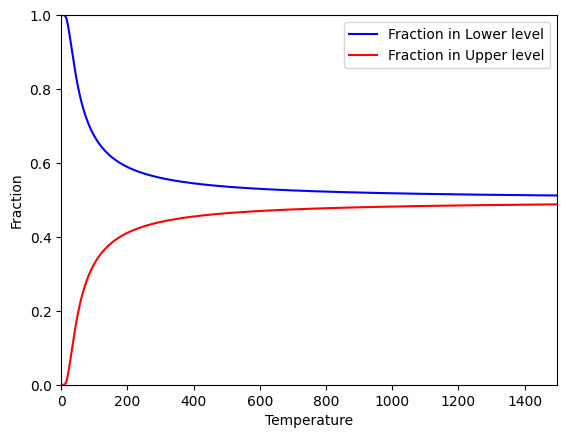

In [27]:
#@title Fraction in each level
upperlevelenergy =  50#@param {type:"integer"}
eps1=[0,upperlevelenergy] #energy levels at 0 and 50 cm^-1

p1=plt.plot(T,f(eps1,T,0),color='blue',label='Fraction in Lower level')
p1.append(plt.plot(T,f(eps1,T,1),color='red',label='Fraction in Upper level'))
plt.xlabel('Temperature')
plt.ylabel('Fraction')
plt.legend()
plt.ylim(0,1)
plt.xlim(0,max(T))

Compare the graphs for two-level systems with spacings of 50 wavenumbers, 500 wavenumbers, and 5000 wavenumbers. Justify the difference in the graphs.


# 3-level system:

In [28]:
eps3=[0,500,1000]

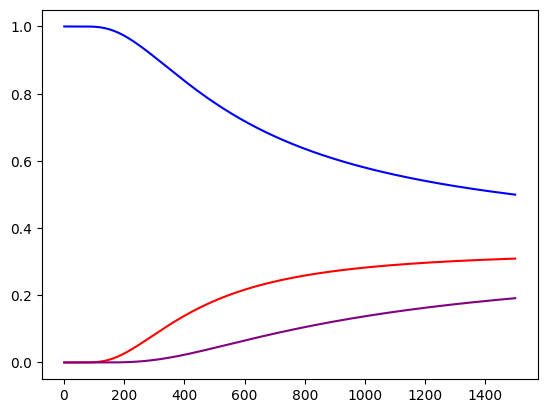

In [29]:
plt.plot(T,f(eps3,T,0),color='blue')
plt.plot(T,f(eps3,T,1),color='red')
plt.plot(T,f(eps3,T,2),color='purple')
plt.show()

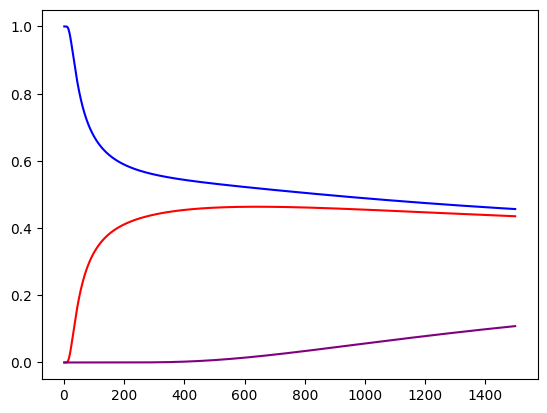

In [30]:
eps4=[0,50,1500]
plt.plot(T,f(eps4,T,0),color='blue')
plt.plot(T,f(eps4,T,1),color='red')
plt.plot(T,f(eps4,T,2),color='purple')
plt.show()

#'infinite' equally spaced system

(0.0, 1000.0)

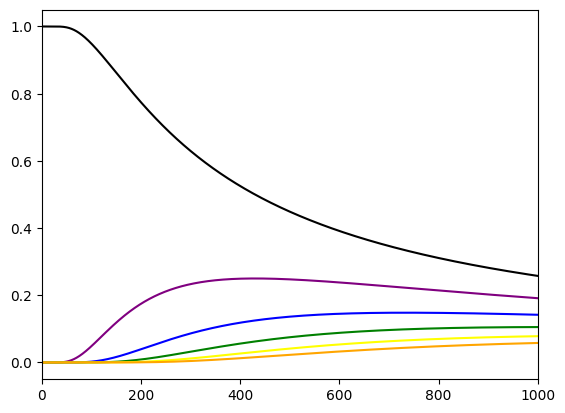

In [31]:
#@title Enter spacing of energy levels as multiple of kT at 298K: { run: "auto" }
spacing =  1 #@param {type:"number"}
T_limit =  1000 #@param {type:"integer"}
eps5=[i for i in np.arange(0,100000,spacing*207.11)]

plt.plot(T,f(eps5,T,0),color='black')
plt.plot(T,f(eps5,T,1),color='purple')
plt.plot(T,f(eps5,T,2),color='blue')
plt.plot(T,f(eps5,T,3),color='green')
plt.plot(T,f(eps5,T,4),color='yellow')
plt.plot(T,f(eps5,T,5),color='orange')
plt.xlim(0,T_limit)

#Translational Levels

Argon atom in 1 L cube

In [32]:
def qt(T,m,vol):
  return (2*np.pi*m*k*h*c*T/h**2)**(3/2)*vol

In [33]:
m=.040/N_A # in kg
V=0.001 # in m**3

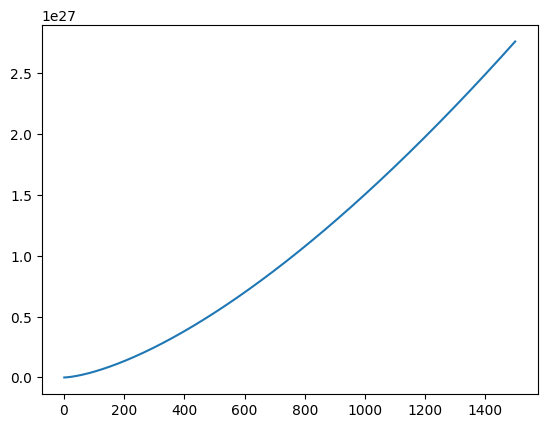

In [34]:
plt.plot(T,qt(T,m,V))

# Rotational levels

In [35]:
def qr(T,B):
  return k*T/B

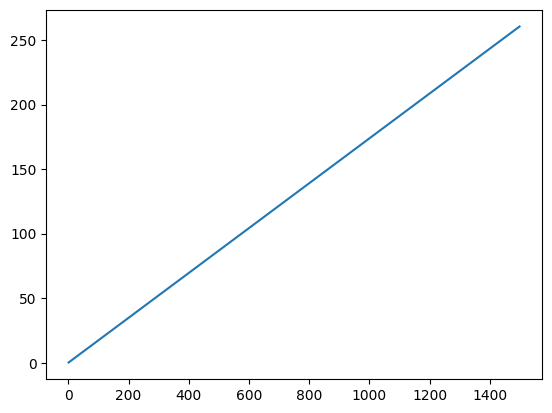

In [36]:
plt.plot(T,qr(T,B=4))

# Vibrational levels

In [37]:
def qv(T,nu):
  return 1/(1-np.exp(-nu/k/T))

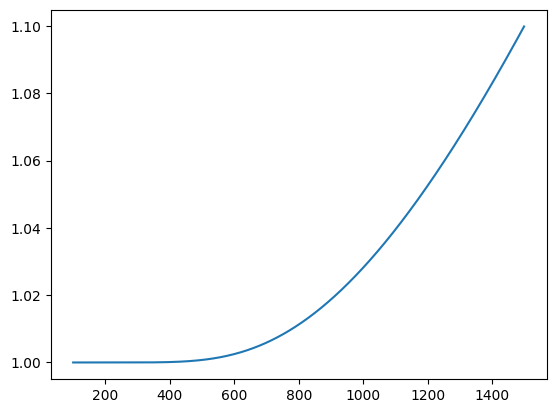

In [38]:
T=np.arange(100,1500)
plt.plot(T,qv(T,2500))